In [1]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import time


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Processed Frame 0 | Vehicles: 24
Processed Frame 30 | Vehicles: 22
Processed Frame 60 | Vehicles: 23
Processed Frame 90 | Vehicles: 24
Processed Frame 120 | Vehicles: 26
Processed Frame 150 | Vehicles: 27
Processed Frame 180 | Vehicles: 26
Processed Frame 210 | Vehicles: 21
Processed Frame 240 | Vehicles: 21
Processed Frame 270 | Vehicles: 29
Processed Frame 300 | Vehicles: 26
Processed Frame 330 | Vehicles: 24
Processed Frame 360 | Vehicles: 25
Processed Frame 390 | Vehicles: 25
Processed Frame 420 | Vehicles: 26
Processed Frame 450 | Vehicles: 26
Processed Frame 480 | Vehicles: 27
Processed Frame 510 | Vehicles: 29
Processed Frame 540 | Vehicles: 27
Processed Frame 570 | Vehicles: 20
Processed Frame 600 | Vehicles: 24
Processed Frame 630 | Vehicles: 20
Processed Frame 660 | Vehicles: 20
Processed Frame 690 | Vehicles: 19
Processed Frame 720 | Vehicles: 20
Processed Frame 750 | Vehicles: 21
Processed Frame 780 | Vehicles: 27
Processed Frame 810 | Vehicles: 24
Processed Frame 840 | Veh

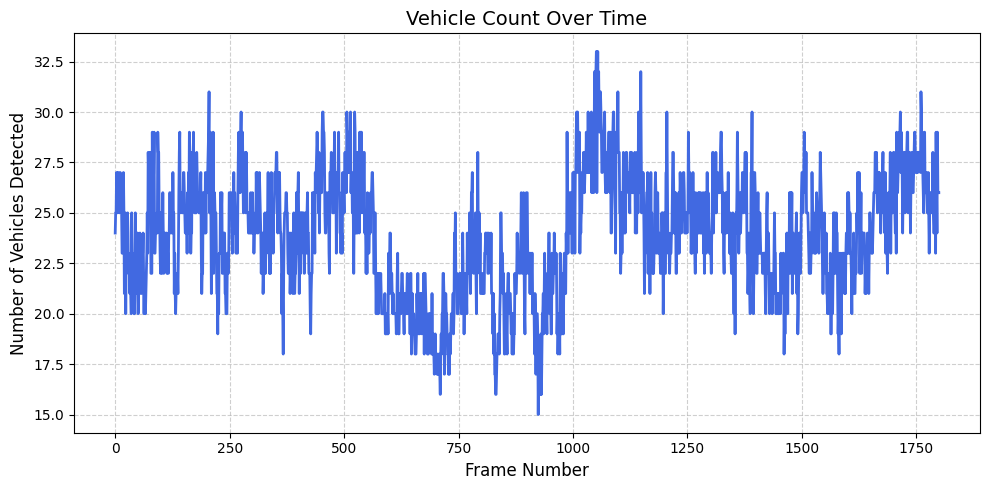

✅ Vehicle count plot saved to: /content/drive/MyDrive/AI ML Projects/Vehicle Detection/vehicle_count_plot.png


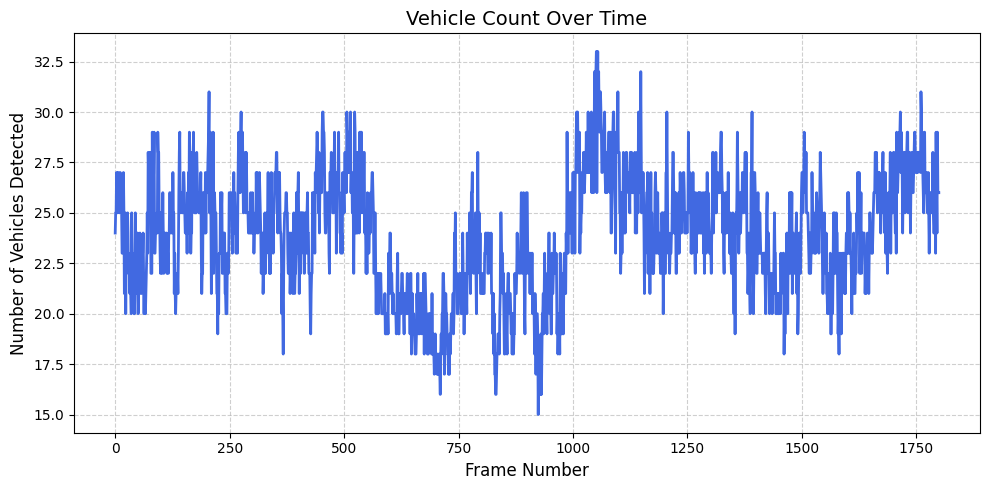

In [3]:
# Replace with your own Drive video path
video_path = '/content/drive/MyDrive/AI ML Projects/Vehicle Detection/traffic (1).mp4'  # 🔸 Update this path

# ============================================
# 🤖 Step 4: Load Pre-Trained YOLOv8 Model
# ============================================
model = YOLO('yolov8n.pt')  # YOLOv8 nano = fastest & small

# ============================================
# 🎥 Step 5: Read Video and Detect Vehicles
# ============================================
cap = cv2.VideoCapture(video_path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

# Save output video in Drive
output_video_path = '/content/drive/MyDrive/AI ML Projects/Vehicle Detection/vehicle_detection_output.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

frame_counts = []
vehicle_counts = []
frame_number = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 on each frame
    results = model(frame, verbose=False)
    detections = results[0].boxes

    count = 0
    for box in detections:
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        if label in ['car', 'truck', 'bus', 'motorbike']:
            count += 1

    # Annotated frame (with boxes and labels)
    annotated_frame = results[0].plot()

    # Write to output video
    out.write(annotated_frame)

    # Save counts
    frame_counts.append(frame_number)
    vehicle_counts.append(count)

    if frame_number % 30 == 0:
        print(f"Processed Frame {frame_number} | Vehicles: {count}")

    frame_number += 1

cap.release()
out.release()

print(f"✅ Detection complete! Annotated video saved to: {output_video_path}")

# ============================================
# 📊 Step 6: Plot and Save Vehicle Count Graph
# ============================================
plt.figure(figsize=(10, 5))
plt.plot(frame_counts, vehicle_counts, color='royalblue', linewidth=2)
plt.xlabel('Frame Number', fontsize=12)
plt.ylabel('Number of Vehicles Detected', fontsize=12)
plt.title('Vehicle Count Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save the graph to Drive
graph_path = '/content/drive/MyDrive/AI ML Projects/Vehicle Detection/vehicle_count_plot.png'
plt.figure(figsize=(10, 5))
plt.plot(frame_counts, vehicle_counts, color='royalblue', linewidth=2)
plt.xlabel('Frame Number', fontsize=12)
plt.ylabel('Number of Vehicles Detected', fontsize=12)
plt.title('Vehicle Count Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(graph_path)

print(f"✅ Vehicle count plot saved to: {graph_path}")